<a href="https://colab.research.google.com/github/ridhokurniawan-u/Stable_Diffusion/blob/main/Stable_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirement for testing
 - Tesla T4 GPU
 - or Higher.

> Thats All.



1. Start installing Keras_CV and Tensorflow

In [1]:
pip install keras_cv tensorflow --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
    

2. Next, importing the modules used in this generator

In [2]:
import time
import matplotlib.pyplot as plt
from tensorflow import keras
import keras_cv

3. Create a model for the image generator

In [3]:
models = keras_cv.models.StableDiffusion(img_width=512, img_height=512)

By using this model checkpoint, you acknowledge that its usage is subject to the terms of the CreativeML Open RAIL-M license at https://raw.githubusercontent.com/CompVis/stable-diffusion/main/LICENSE


4. Try to generate several image. I recommend 2 batch of images per session
> PS : More than 2 batch require more resource to be used.



50/50 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step


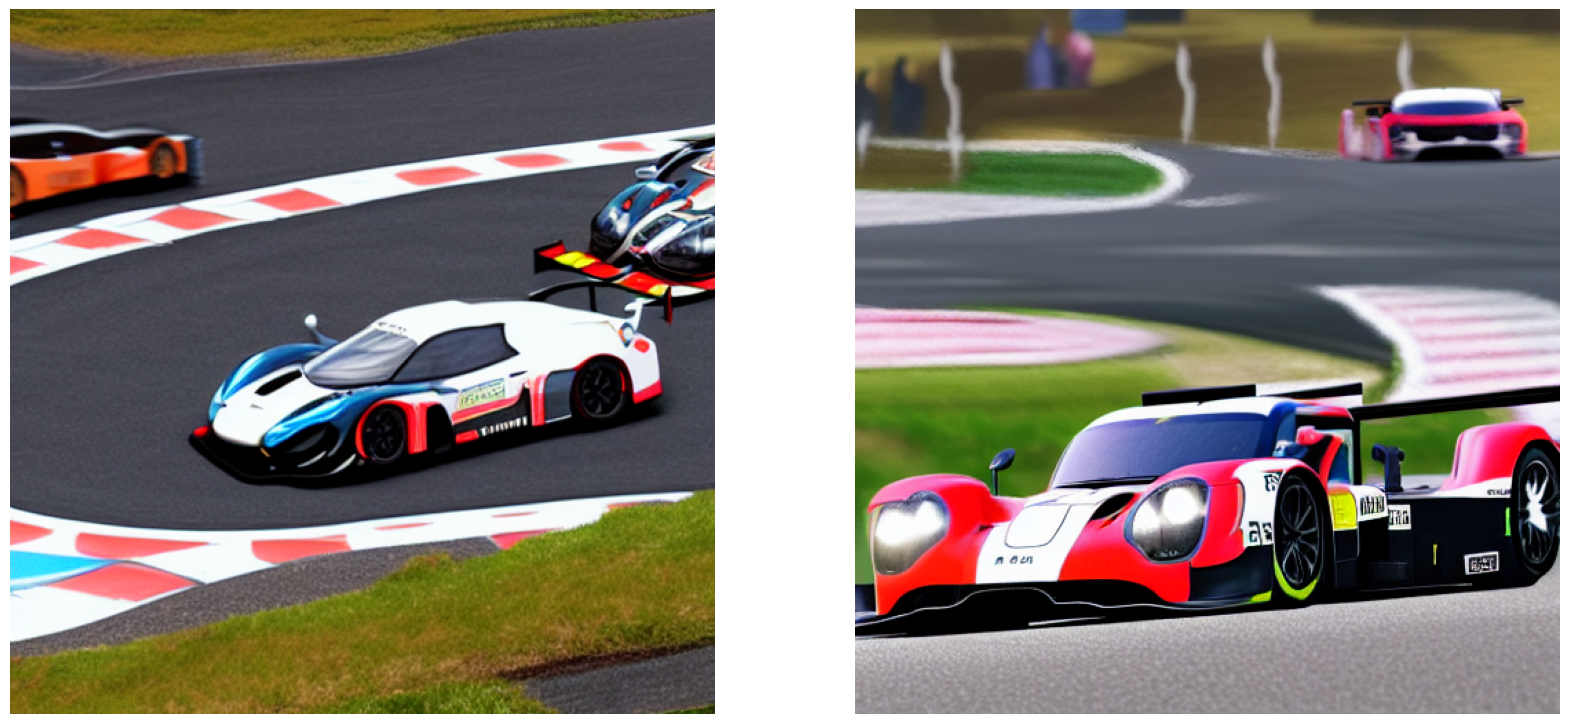

In [7]:
# Used For the machine trigger on what to generate by converting text to images
images = models.text_to_image("A mountain circuit with LMGT3 And Le Mans Prototype racing cars, multiple cars, realistic", batch_size=2)

#Pyplot used to draw/display the image, which was generated by.
def plot_images(images):
    plt.figure(figsize=(20, 20))
    for i in range(len(images)):
        ax = plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i])
        plt.axis("off")


plot_images(images)

50/50 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step
Standard model: 60.55 seconds


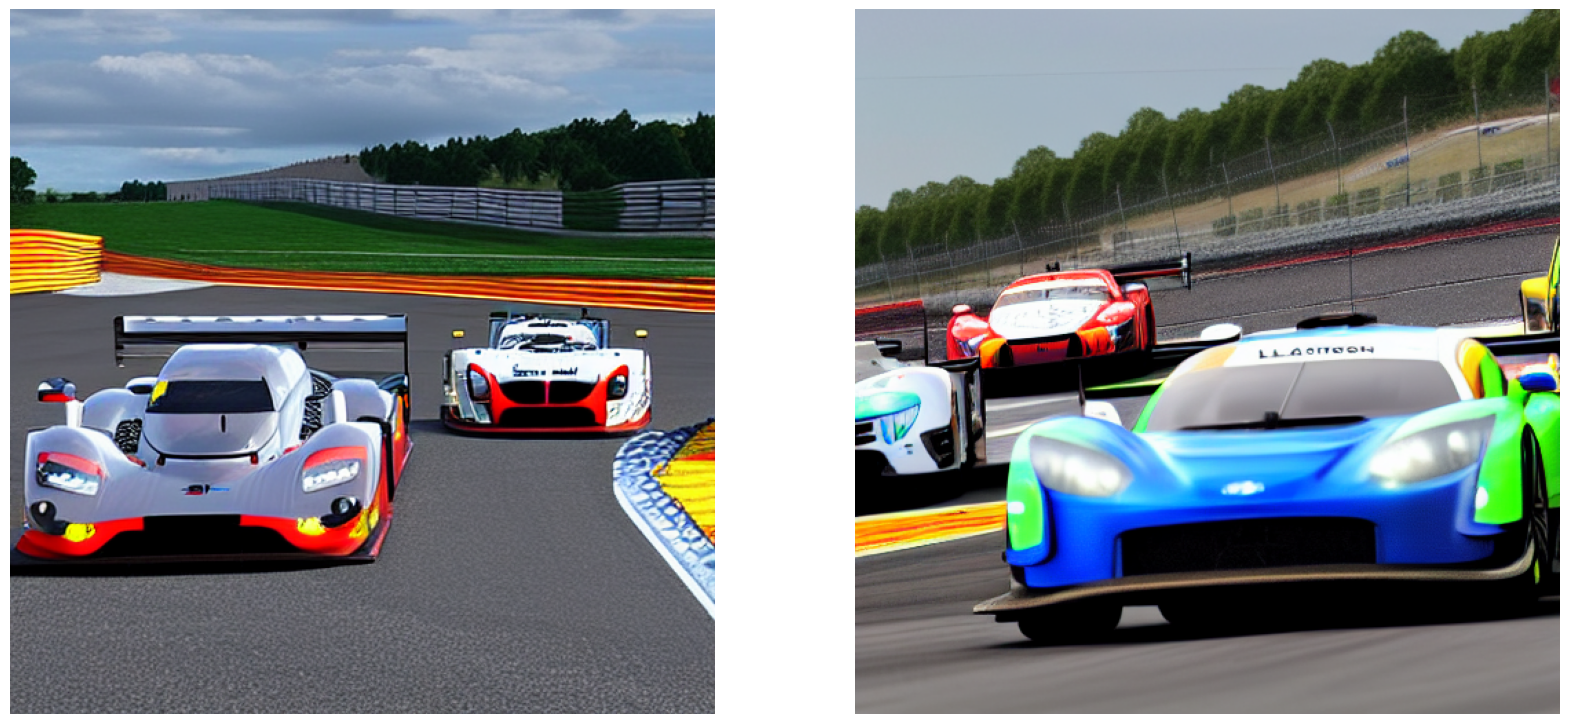

In [10]:
benchmark_test = []
start = time.time()
images_bench =  models.text_to_image("A mountain circuit with LMGT3 And Le Mans Prototype racing cars, multiple cars, realistic", batch_size=2)
end = time.time()
benchmark_test.append({"Standard", end - start})
plot_images(images_bench)

print(f"Standard model: {(end - start):.2f} seconds")
keras.backend.clear_session()
